<h1 align="center">Lab 6</h1>

<h2>Imports and Stuff</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from skimage import morphology
from skimage import measure
from skimage.color import rgb2gray
from scipy import ndimage
from PIL import Image

def displayImage(images, nrows = 1, ncols=1, title=[],image_max=0,plotsize=10):
    #Handle the case of 1 image
    if nrows == 1 and ncols == 1:
        images = [images]
    #Mismatch
    if len(images) != nrows*ncols:
        print("Number of images != number of subplots")
        return
    #Title mismathc
    if len(images) != len(title) and len(title)!=0:
        print("Number of images != number of titles")
        return
    fig = plt.figure(figsize=(plotsize,plotsize))
    ax = []
    for i in range(1, ncols*nrows +1):
        image = images[i-1]
        
        #Deal for various types
        type = image.dtype
        if np.issubdtype(type, np.integer):
            if image_max==0:
                im_max = np.iinfo(type).max
            else:
                im_max=copy.deepcopy(image_max)
        else:
            im_max = 1
        
        plt.gray()
        ax.append( fig.add_subplot(nrows, ncols,i))
        if len(title)!=0:
            ax[-1].set_title(title[i-1])
        plt.axis("off")
        plt.imshow(image,vmin=0,vmax=im_max)
    plt.show()
    
#Convert float to uint8
def im2int8(image):
    image = image.astype(np.float32)
    image = 255 * image
    image = image.astype(np.uint8)
    return image

#Converts an image to float32
def im2float32(image):
    type = image.dtype
    if np.issubdtype(type, np.integer):
        info = np.iinfo(image.dtype)
        image = image.astype(np.float32) / info.max
    return image


<h2>Problems</h2>

<b>Question 1: </b>Given the image in Figure 1 (‘circles.tif’),
<br>
<ul>
    <li>How would you split the image into disconnected components?
</ul>

<b>Answer: </b>Appy an erosion to the image, which shrinks each circle.

<ul>
    <li>Try your idea out in Python or Matlab.
</ul>

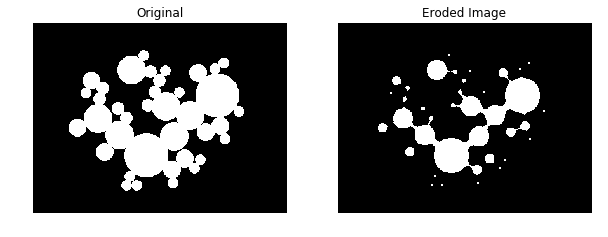

In [2]:
circles = Image.open("circles.tif")
circles = np.asarray(circles)

diskSize = 7
B = morphology.disk(diskSize)

C = np.logical_not(morphology.disk(diskSize+1)).astype(np.uint8)

circles1 = morphology.binary_erosion(circles,B)

displayImage([circles,circles1],1,2,["Original","Eroded Image"])

<ul>
    <li>How would you isolate the two biggest circles in the image?
</ul>

<b>Answer: </b>Erode enough to isolate just the two circles, then dilate by the same amount to enlarge them.

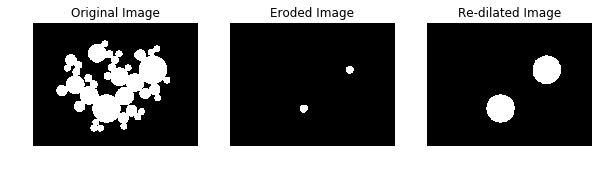

In [3]:
circles = Image.open("circles.tif")
circles = np.asarray(circles)

diskSize = 25
B = morphology.disk(diskSize)

circles1 = morphology.binary_erosion(circles,B)
circles2 = morphology.binary_dilation(circles1,B)
displayImage([circles,circles1,circles2],1,3,["Original Image","Eroded Image","Re-dilated Image"])

<b>Question 2: </b>Given the image ‘UTK.tif’,
<ul>
    <li>How would you extract the border of the image?
</ul>

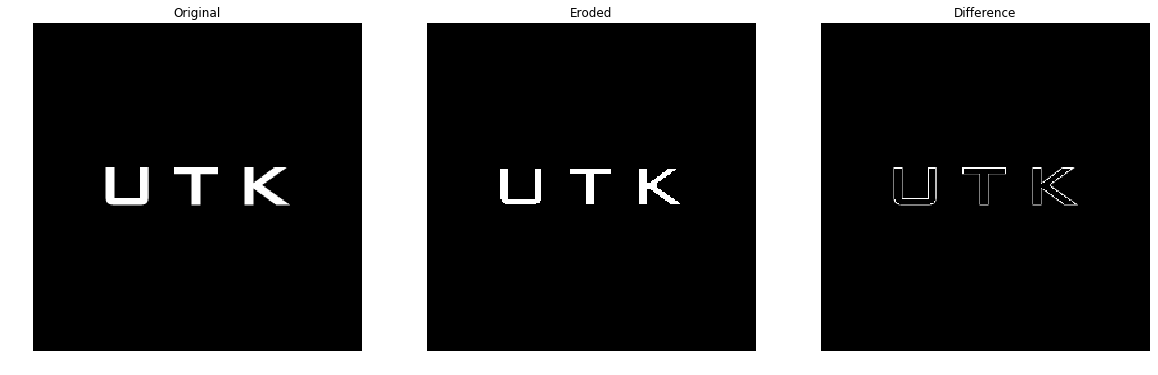

In [4]:
utk = Image.open("UTK.tif")
utk = np.asarray(utk)
#utk = rgb2gray(utk)

Bsize = 3
B = np.ones((Bsize,Bsize))
utk2 = morphology.binary_erosion(utk,B)
utk2 = utk2.astype(np.uint8)*255
utk3 = utk-utk2

displayImage([utk,utk2,utk3],1,3,["Original","Eroded","Difference"],plotsize=20)

<ul>
    <li>How would you isolate one of the letters, say ‘K’, in the image?
</ul>
<br>
Find connected component of a point in K

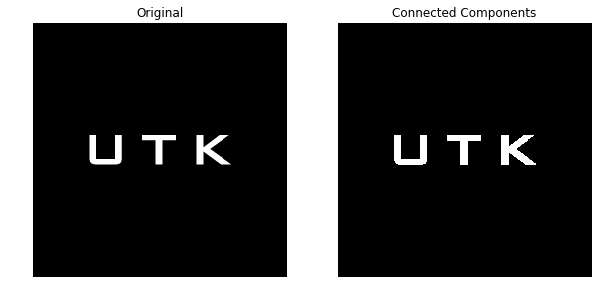

In [11]:
labeled, nr_objects = ndimage.label(utk)
displayImage([utk,labeled.astype(np.bool)],1,2,title=["Original","Connected Components"])

<b>Question 3:</b>Given the image in Figure 2 (‘samll_sqaures.png’),
<ul>
    <li>How to find the (approximate) central coordinate of the smallest square, which is a 4x4 square, in the
image?
    <li>Once the coordinate is identified, how to reconstruct the small square?
</ul>

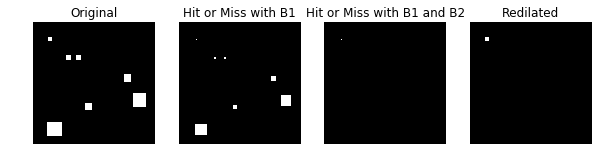

In [30]:
squares = plt.imread("small_square.png")

B = np.ones((4,4))
Bcom = np.zeros((6,6))
Bcom[:,0] = 1
Bcom[:,5] = 1
Bcom[0,:] = 1
Bcom[5,:] = 1

matching = ndimage.morphology.binary_hit_or_miss(squares,B)
smallest = ndimage.morphology.binary_hit_or_miss(squares,B,Bcom)
reconstructed = morphology.binary_dilation(smallest,B)
displayImage([squares,matching,smallest,reconstructed],1,4, \
             title=["Original","Hit or Miss with B1","Hit or Miss with B1 and B2","Redilated"])

<b>Question 6: </b>Given the image ‘noisy_fingerprint’, perform the following operations.
<ul>
    <li>Remove the noise in the image using suitable morphological operations.
    <li>Thin the fingerprint ridges using suitable morphological operations.
</ul>

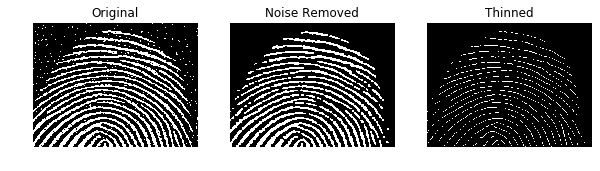

In [41]:
finger = Image.open('noisy_fingerprint.tif')
finger = np.asarray(finger)

B = np.ones((3,3))

finger_salt = morphology.binary_opening(finger,B)
finger_noiseless = morphology.binary_closing(finger_salt,B)

finger_thin = morphology.thin(finger_noiseless)

displayImage([finger,finger_noiseless,finger_thin],1,3,title=["Original","Noise Removed","Thinned"])